In [1]:
import os
import logging
import matplotlib.pyplot as plt

# EOReader
from eoreader.reader import Reader
from eoreader.bands import VV, HH, VV_DSPK, HH_DSPK, HILLSHADE, SLOPE, to_str
from eoreader.env_vars import DEM_PATH

In [2]:
# Create logger

logger = logging.getLogger("eoreader")
logger.setLevel(logging.INFO)

# create console handler and set level to debug
ch = logging.StreamHandler()
ch.setLevel(logging.INFO)

# create formatter
formatter = logging.Formatter('%(message)s')

# add formatter to ch
ch.setFormatter(formatter)

# add ch to logger
logger.addHandler(ch)

In [3]:
# First of all, we need some VHR data, let's use some COSMO-SkyMed data
path = os.path.join("/home", "data", "DATA", "PRODS", "COSMO", "1st_GEN", "1001512-735097")

# Open your product
prod = Reader().open(path, remove_tmp=True)
prod

eoreader.CskProduct 'CSKS4_DGM_B_HI_09_HH_RA_FF_20201008224018_20201008224025'
Attributes:
	condensed_name: 20201008T224018_CSK_HH_HI_DGM
	path: /home/data/DATA/PRODS/COSMO/1st_GEN/1001512-735097
	constellation: COSMO-SkyMed
	sensor type: SAR
	product type: DGM
	default resolution: 5.0
	acquisition datetime: 2020-10-08T22:40:18.446381
	band mapping:
		HH: HH
		HH_DSPK: HH_DSPK
	needs extraction: True
	orbit direction: ASCENDING

/opt/conda/lib/python3.9/site-packages/rasterio/__init__.py:277: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/conda/lib/python3.9/site-packages/rioxarray/_io.py:851: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/opt/conda/lib/python3.9/site-packages/rasterio/__init__.py:287: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


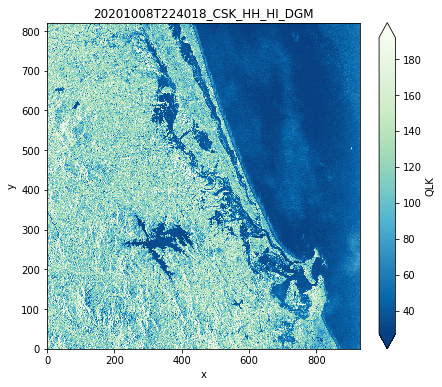

In [4]:
# Plot the quicklook
prod.plot()

In [5]:
# Get the band information
prod.bands

eoreader.SarBand 'HH'
Attributes:
	id: HH
	eoreader_name: HH
	gsd (m): 5.0
	asset_role: intensity
eoreader.SarBand 'HH_DSPK'
Attributes:
	id: HH_DSPK
	eoreader_name: HH_DSPK
	gsd (m): 5.0
	asset_role: intensity

Acquisition datetime: 2020-10-08 22:40:18.446381
Condensed name: 20201008T224018_CSK_HH_HI_DGM


/opt/conda/lib/python3.9/site-packages/rasterio/__init__.py:277: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Currently installed 8.0, available is 9.0.0.
Please visit http://step.esa.int



Executing processing graph


.Copernicus_DSM_COG_10_N15_00_E108_00_DEM.tif


.

.

.

10%

.

.

.

.

20%

.

.

.

.

30%

.

.

.

.

40%

.

.

.

.

50%

.

.

.

.

60%

.

.

.

.

70%

.

.

.

.

80%

.

.

.

.

90%

 done.


<AxesSubplot:>

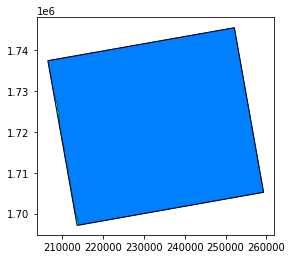

In [6]:
# Print some data
print(f"Acquisition datetime: {prod.datetime}")
print(f"Condensed name: {prod.condensed_name}")

# Open here some more interesting geographical data: extent and footprint
extent = prod.extent()
footprint = prod.footprint()

base = extent.plot(color='cyan', edgecolor='black')
footprint.plot(ax=base, color='blue', edgecolor='black', alpha=0.5)

In [7]:
# Set the DEM
os.environ[DEM_PATH] = os.path.join("/home", "data", "DS2", "BASES_DE_DONNEES", "GLOBAL", "COPDEM_30m", "COPDEM_30m.vrt")

# Select some bands you wish to load without knowing if they exist
bands = [VV, HH, VV_DSPK, HH_DSPK, HILLSHADE, SLOPE]

# Only keep those selected
ok_bands = [band for band in bands if prod.has_band(band)]

# This product does not have VV band and HILLSHADE band cannot be computed from SAR band
print(to_str(ok_bands))

['HH', 'HH_DSPK', 'SLOPE']


In [8]:
# Load those bands as a dict of xarray.DataArray, with a 20m resolution
band_dict = prod.load(ok_bands, resolution=20.)
band_dict[HH]

Currently installed 8.0, available is 9.0.0.
Please visit http://step.esa.int



Executing processing graph


first_line_time metadata value is null
last_line_time metadata value is null
...10%...21%...32%...43%.

.

.

54%.

.

.

65%.

..

76%.

.

.

87%.

 done.


<xarray.DataArray 'HH' (band: 1, y: 2474, x: 2689)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * x            (x) float64 2.058e+05 2.059e+05 ... 2.596e+05 2.596e+05
  * y            (y) float64 1.746e+06 1.746e+06 ... 1.697e+06 1.697e+06
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes:
    scale_factor:      1.0
    add_offset:        0.0
    long_name:         HH
    constellation:     COSMO-SkyMed
    constellation_id:  CSK
    product_path:      /home/data/DATA/PRODS/COSMO/1st_GEN/1001512-735097
    product_name:      CSKS4_DGM_B_HI_09_HH_RA_FF_20201008224018_20201008224025
    product_filename:  1001512-735097
    instrument:        SAR-2000
    product_type:      DGM
    acquisition_date:  20201008T224018
    condensed_name:    20201008T224018_CSK_HH_HI_DGM
    orbit_direction:   ASCENDING

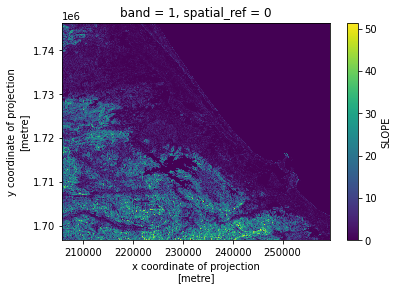

In [9]:
# Plot a subsampled version
band_dict[SLOPE][:, ::10, ::10].plot()

In [10]:
# You can also stack those bands
stack = prod.stack(ok_bands)
stack

<xarray.DataArray 'HH_HH_DSPK_SLOPE' (z: 3, y: 9897, x: 10755)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 0.4255329 ,  0.4255329 ,  0.4255329 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.4255329 ,  0.4255329 ,  0.4255329 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.4255329 ,  0.4255329 ,  0.4255329 , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [16.66219   , 16.66219   , 16.66219   , ...,  0.0870695 ,
          0.0870695 ,  0.0870695 ],
        [16.66219   , 16.66219   , 16.66219   , ...,  0.0870695 ,
          0.0870695 ,  0.0870695 ],
        [17.018255  , 17.018255  , 17.018255  , ...,  0.08737368,
          0.08737368,  0.08737368]]], dtype=float32)
Coordinates:
    spatial_ref  int64 0
  * x            (x) float64 2.058e+05 2.058e+05 ... 2.596e+05 2.596e+05
  * y            (y) float64 1.746e+06 1.746e+06 ... 1.697e+06 1.697e+06
  * z            (z) MultiIndex
  - variable     (z) object 'HH' 'HH_DSPK' 'SLOPE'
  - band         (z) int64 1 1 1
Attributes:
    long_name:         HH HH_DSPK SLOPE
    constellation:     COSMO-SkyMed
    constellation_id:  CSK
    product_path:      /home/data/DATA/PRODS/COSMO/1st_GEN/1001512-735097
    product_name:      CSKS4_DGM_B_HI_09_HH_RA_FF_20201008224018_20201008224025
    product_filename:  1001512-735097
    instrument:        SAR-2000
    product_type:      DGM
    acquisition_date:  20201008T224018
    condensed_name:    20201008T224018_CSK_HH_HI_DGM
    orbit_direction:   ASCENDING

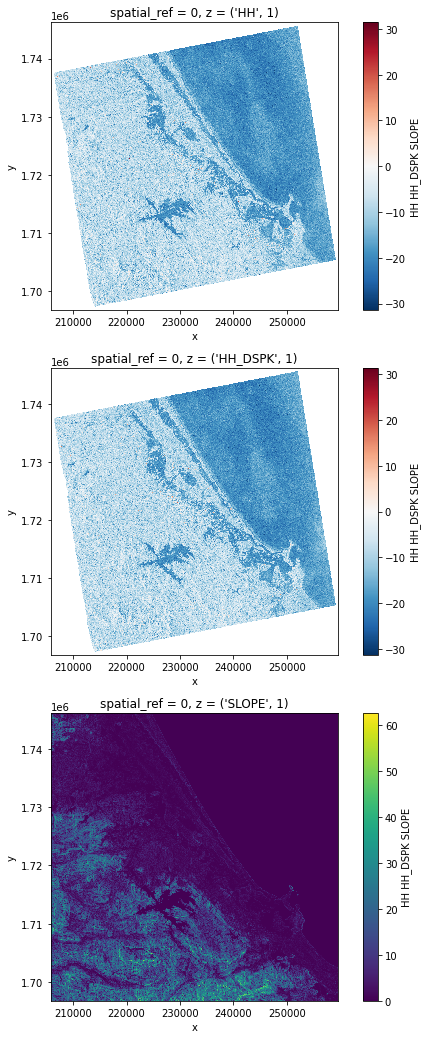

In [11]:
# Plot a subsampled version
nrows = len(stack)
fig, axes = plt.subplots(nrows=nrows, figsize=(3 * nrows, 6 * nrows), subplot_kw={"box_aspect": 1})

for i in range(nrows):
    stack[i, ::10, ::10].plot(x="x", y="y", ax=axes[i])